In [1]:
import nltk
import string

import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import plotly.express    as px

from matplotlib import cm
from tqdm       import tqdm
from wordcloud  import WordCloud

from nltk.probability import FreqDist
from nltk.corpus      import stopwords
from nltk.tokenize    import sent_tokenize, word_tokenize
from nltk.stem        import PorterStemmer, WordNetLemmatizer

from sklearn         import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, make_scorer, accuracy_score

from sklearn.preprocessing           import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection         import train_test_split, GridSearchCV

from sklearn.naive_bayes   import MultinomialNB, GaussianNB
from sklearn.ensemble      import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble      import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm           import SVC

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
tqdm.pandas()

np.random.seed(0)

[nltk_data] Downloading package stopwords to /home/jojo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jojo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jojo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/home/jojo/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
df = pd.read_csv('all_headlines.csv')

In [3]:
sw_list  = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '27', '1', "'ve", '-', '–', '—', "n't", 
            'https', '2', "'re", "'m'", '3', '..', 'ca', "'s", 'amp', 'corona', 'coronavirus', 'covid-19', 
            'coronavirus.', 'covid-19.', 'a', 'the', 'to', 'of', 'on', 'and', 'on', 'for']

In [4]:
fake = df[df['real_or_fake'] == 1]
real = df[df['real_or_fake'] == 0]

In [30]:
real

,headline,real_or_fake
1501,A post claims compulsory vacination violates t...,0
1502,A photo claims that this person is a doctor wh...,0
1503,Post about a video claims that it is a protest...,0
1504,All deaths by respiratory failure and pneumoni...,0
1505,The dean of the College of Biologists of Euska...,0
...,...,...
111916,what our grieving family needs from loved ones...,0
111917,stephen colbert attempts to list everything tr...,0
111918,bakery owner vows to stop making wedding cakes...,0
111922,how san antonio's dominant defense is fueling ...,0


In [31]:
fake

,headline,real_or_fake
0,India Is In The Middle Of A Coronavirus YouTub...,1
1,"Tweet: False reporting on ""shooting down"" peop...",1
2,"Tweet: A woman eating a delicacy, attributing ...",1
3,Tweet: False chain message about NYPD containm...,1
4,Hoax Alert: Viral 'Emergency Notification' On ...,1
...,...,...
111921,polish rapper under fire for use of the word '...,1
111923,jews to celebrate rosh hashasha or something,1
111924,internal affairs investigator disappointed con...,1
111926,mars probe destroyed by orbiting spielberg-gat...,1


In [5]:
data_fake = fake['headline']
fake_words = [d.split() for d in data_fake.to_list()]

## Horizontal Bar Graphs

### Fake Words from All Headlines

In [35]:
total_fake_list = list()
for sublist in fake_words:
    for word in sublist:
        total_fake_list.append(word)
print(len(total_fake_list))

627863


In [40]:
total_fake_set = set(total_fake_list)
len(total_fake_set)

63179

In [12]:
total_fake = set()
for words in fake_words:
    total_fake.update([w.lower() for w in words])
print(len(total_fake))

lower_fake_words = [item.lower() for sublist in fake_words for item in sublist]
clean_fake_words = [item for item in lower_fake_words if item not in sw_list]
fake_freq = FreqDist(clean_fake_words)
top25_fake = fake_freq.most_common(25)
top25_fake

47078


[('trump', 7200),
 ('[video]', 5054),
 ('new', 2753),
 ('(video)', 2543),
 ('man', 2529),
 ('obama', 1970),
 ('hillary', 1671),
 ('trump’s', 1463),
 ('watch:', 1212),
 ('president', 1133),
 ('clinton', 1118),
 ('one', 1108),
 ('white', 1054),
 ('area', 972),
 ('woman', 949),
 ('black', 921),
 ('report:', 918),
 ('donald', 874),
 ('u.s.', 872),
 ('house', 865),
 ('says', 854),
 ('gop', 843),
 ('like', 802),
 ('people', 793),
 ('gets', 773)]

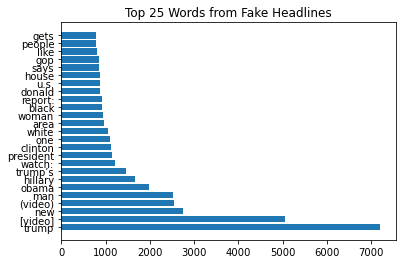

In [19]:
top25_fakedf = pd.DataFrame(top25_fake)
plt.barh(top25_fakedf[0], top25_fakedf[1])
plt.title('Top 25 Words from Fake Headlines')
#plt.savefig('top_fake_words.png')
plt.show()

### Real Words from All Headlines

In [38]:
total_real_list = list()
for sublist in real_words:
    for word in sublist:
        total_real_list.append(word)
len(total_real_list)

669759

In [39]:
total_real_set = set(total_real_list)
len(total_real_set)

53130

In [13]:
data_real = real['headline']
real_words = [d.split() for d in data_real.to_list()]

total_real = set()
for words in real_words:
    total_real.update([w.lower for w in words])
print(len(total_real))

lower_real_words = [item.lower() for sublist in real_words for item in sublist]
clean_real_words = [item for item in lower_real_words if item not in sw_list]
real_freq = FreqDist(clean_real_words)
top25_real = real_freq.most_common(25)

top25_real

655625


[('trump', 6453),
 ('u.s.', 4415),
 ('says', 4081),
 ('new', 2698),
 ('house', 1764),
 ("trump's", 1397),
 ('people', 1337),
 ('video', 1290),
 ('white', 1192),
 ('north', 1154),
 ('bill', 1094),
 ('president', 1063),
 ('donald', 1054),
 ('state', 997),
 ('police', 949),
 ('shows', 945),
 ('court', 935),
 ('china', 934),
 ('government', 901),
 ('senate', 895),
 ('obama', 887),
 ('clinton', 871),
 ('may', 864),
 ('russia', 858),
 ('korea', 800)]

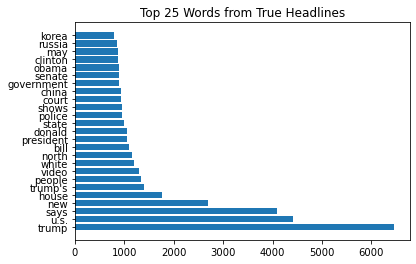

In [18]:
top25_realdf = pd.DataFrame(top25_real)
plt.barh(top25_realdf[0], top25_realdf[1])
plt.title('Top 25 Words from True Headlines')
#plt.savefig('top_real_words.png')
plt.show()

### Fake Words from Zenodo Headlines

In [14]:
covid_fake = pd.read_csv('~/Documents/Flatiron/Phase_5/Data/Headlines/Zenodoheadlines.csv')

data_covid_fake_heads = covid_fake['headline']
cov_fake_words = [d.split() for d in data_covid_fake_heads.to_list()]

total_cov_fake = set()
for words in cov_fake_words:
    total_cov_fake.update([w.lower for w in words])
print(len(total_cov_fake))

lower_cov_fake_words = [item.lower() for sublist in cov_fake_words for item in sublist]
clean_cov_fake_words = [item for item in lower_cov_fake_words if item not in sw_list]
cov_fake_freq = FreqDist(clean_cov_fake_words)
top25_cov_fake = cov_fake_freq.most_common(25)
top25_cov_fake

163225


[('video', 1009),
 ('people', 848),
 ('shows', 692),
 ('new', 555),
 ('says', 474),
 ('claims', 426),
 ('claim', 426),
 ('shared', 412),
 ('novel', 400),
 ('government', 398),
 ('facebook', 374),
 ('president', 372),
 ('vaccine', 352),
 ('due', 349),
 ('health', 336),
 ('infected', 334),
 ('photo', 330),
 ('lockdown', 319),
 ('times', 295),
 ('cure', 294),
 ('chinese', 293),
 ('china', 293),
 ('posts', 281),
 ('hospital', 278),
 ('image', 271)]

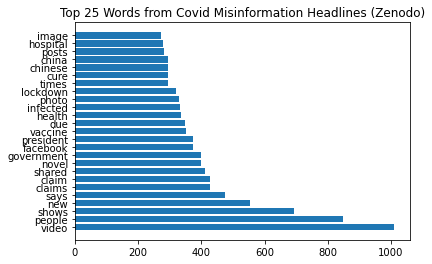

In [17]:
top25_cov_fakedf = pd.DataFrame(top25_cov_fake)
plt.barh(top25_cov_fakedf[0], top25_cov_fakedf[1])
plt.title('Top 25 Words from Covid Misinformation Headlines (Zenodo)')
#plt.savefig('top_cov_fake_words.png')
plt.show()

### Fake Words from ESOC Headlines

In [15]:
covid_misinfo = pd.read_csv('Data/Headlines/ESOCheadlines_eng.csv')

data_covid_misinfo_heads = covid_misinfo['headline']
cov_misinfo_words = [d.split() for d in data_covid_misinfo_heads.to_list()]

total_cov_misinfo = set()
for words in cov_misinfo_words:
    total_cov_misinfo.update([w.lower for w in words])
print(len(total_cov_misinfo))

lower_cov_misinfo_words = [item.lower() for sublist in cov_misinfo_words for item in sublist]
clean_cov_misinfo_words = [item for item in lower_cov_misinfo_words if item not in sw_list]
cov_misinfo_freq = FreqDist(clean_cov_misinfo_words)
top25_cov_misinfo = cov_misinfo_freq.most_common(25)
top25_cov_misinfo

18376


[('no,', 148),
 ('false:', 101),
 ('video', 96),
 ('fact', 88),
 ('fake', 85),
 ('check:', 85),
 ('vaccine', 79),
 ('false', 73),
 ('people', 66),
 ('viral', 62),
 ('claim', 60),
 ('claims', 59),
 ('photo', 57),
 ('health', 52),
 ('novel', 51),
 ('say', 49),
 ('south', 47),
 ('masks', 46),
 ('facebook', 46),
 ('china', 45),
 ('pandemic', 45),
 ('trump', 44),
 ('post', 43),
 ('social', 40),
 ('cure', 39)]

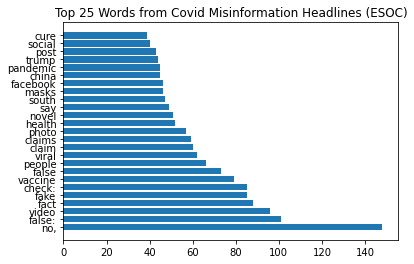

In [16]:
top25_cov_misinfodf = pd.DataFrame(top25_cov_misinfo)
plt.barh(top25_cov_misinfodf[0], top25_cov_misinfodf[1])
plt.title('Top 25 Words from Covid Misinformation Headlines (ESOC)')
#plt.savefig('top_cov_misinfo_words.png')
plt.show()

### Fake Words for Combined Zenodo and ESOC Headlines

In [20]:
all_fake_misinfo = pd.concat([covid_fake, covid_misinfo], ignore_index=True)
data_all_fake_misinfo_head = all_fake_misinfo['headline']
all_fake_misinfo_words = [d.split() for d in data_all_fake_misinfo_head.tolist()]

total_all_fake_misinfo = set()
for words in all_fake_misinfo_words:
    total_all_fake_misinfo.update([w.lower for w in words])
print(len(total_all_fake_misinfo))

lower_all_fake_misinfo_words = [item.lower() for sublist in all_fake_misinfo_words for item in sublist]
clean_all_fake_misinfo_words = [item for item in lower_all_fake_misinfo_words if item not in sw_list]
all_fake_misinfo_freq = FreqDist(clean_all_fake_misinfo_words)
top25_all_fake_misinfo = all_fake_misinfo_freq.most_common(25)
top25_all_fake_misinfo

181581


[('video', 1105),
 ('people', 914),
 ('shows', 726),
 ('new', 592),
 ('says', 511),
 ('claim', 486),
 ('claims', 485),
 ('novel', 451),
 ('shared', 440),
 ('vaccine', 431),
 ('facebook', 420),
 ('government', 418),
 ('president', 400),
 ('health', 388),
 ('photo', 387),
 ('due', 366),
 ('lockdown', 355),
 ('infected', 342),
 ('china', 338),
 ('cure', 333),
 ('chinese', 318),
 ('hospital', 306),
 ('posts', 304),
 ('times', 304),
 ('masks', 293)]

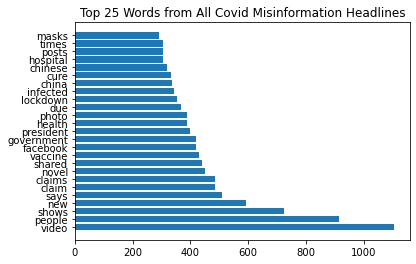

In [21]:
top25_all_fake_misinfodf = pd.DataFrame(top25_all_fake_misinfo)
plt.barh(top25_all_fake_misinfodf[0], top25_all_fake_misinfodf[1])
plt.title('Top 25 Words from All Covid Misinformation Headlines')
#plt.savefig('top_all_fake_misinfo_words.png')
plt.show()

## Word Clouds

In [23]:
real_bar_counts = [x[1] for x in top25_real]
real_bar_words = [x[0] for x in top25_real]

fake_bar_counts = [x[1] for x in top25_fake]
fake_bar_words = [x[0] for x in top25_fake]

cov_fake_bar_counts = [x[1] for x in top25_cov_fake]
cov_fake_bar_words = [x[0] for x in top25_cov_fake]

misinfo_bar_counts = [x[1] for x in top25_cov_misinfo]
misinfo_bar_words = [x[0] for x in top25_cov_misinfo]

all_fake_misinfo_bar_counts = [x[1] for x in top25_all_fake_misinfo]
all_fake_misinfo_bar_words = [x[0] for x in top25_all_fake_misinfo]

In [24]:
real_dict = dict(zip(real_bar_words, real_bar_counts))
fake_dict = dict(zip(fake_bar_words, fake_bar_counts))
cov_fake_dict = dict(zip(cov_fake_bar_words, cov_fake_bar_counts))
misinfo_dict = dict(zip(misinfo_bar_words, misinfo_bar_counts))
all_fake_misinfo_dict = dict(zip(all_fake_misinfo_bar_words, all_fake_misinfo_bar_counts))

### Real Headlines Word Cloud

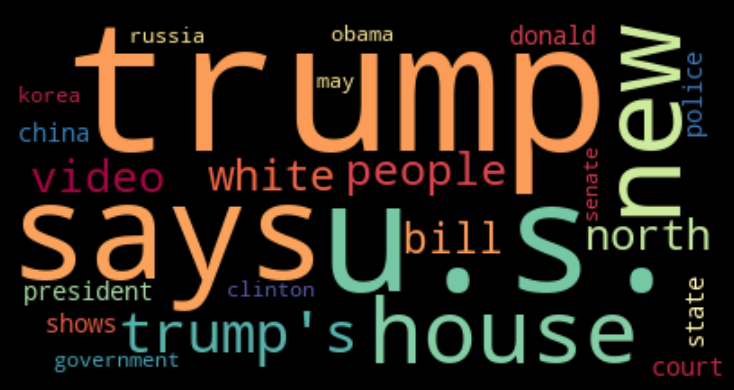

In [25]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(real_dict)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Real Headlines Word Cloud')
plt.tight_layout(pad=0)

#plt.savefig('Real_wordcloud.png')

plt.show()

### Fake and Misinformation Word Clouds

#### All Headlines Fake Word Cloud

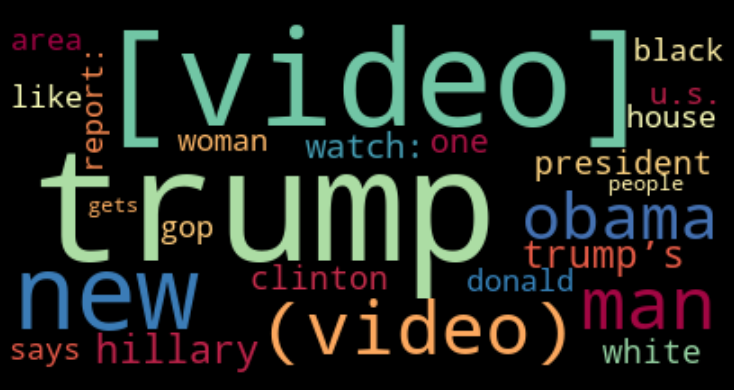

In [26]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fake_dict)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Fake Headlines Word Cloud')
plt.tight_layout(pad=0)

#plt.savefig('allhead_fake_wordcloud.png')

plt.show()

#### Zenodo Headlines Word Cloud

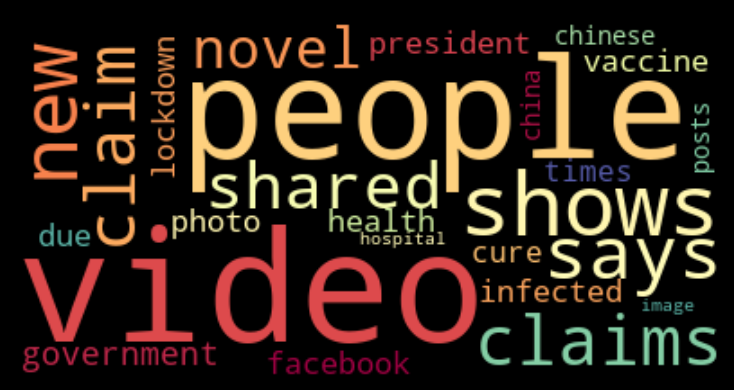

In [27]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(cov_fake_dict)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Zenodo Headlines Word Cloud')
plt.tight_layout(pad=0)

#plt.savefig('zenodo_wordcloud.png')

plt.show()

#### ESOC Headlines Word Cloud

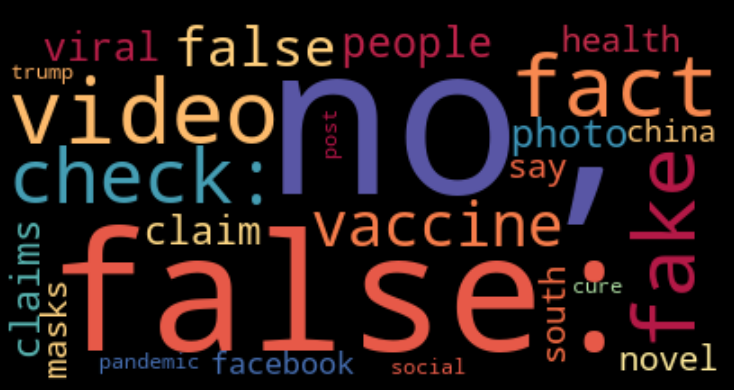

In [28]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(misinfo_dict)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('ESOC Headlines Word Cloud')
plt.tight_layout(pad=0)

#plt.savefig('esoc_wordcloud.png')

plt.show()

#### Combined Zenodo and ESOC Headlines Word Cloud

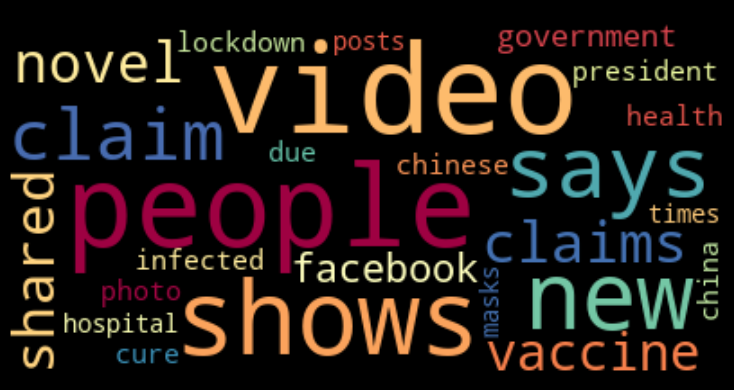

In [29]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(all_fake_misinfo_dict)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Combined Zenodo and ESOC Headlines Word Cloud')
plt.tight_layout(pad=0)

#plt.savefig('combined_wordcloud.png')

plt.show()